Data:
https://www.kaggle.com/code/gklpcsgn/eda-spotify-albums/data

In [1]:
# Manipultion
import numpy as np
import pandas as pd

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

/home/rafael/anaconda3/envs/eda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

sns.set(style='dark', palette='bright')

### First we are going to import the data and find how is the quality of the data 👌

In [3]:
df = pd.read_csv('./data/mysongs_test.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.sample(10)

,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,Ano de Lançamento,País
106,Torches,0.04,0.65,0.88,0.02,0.16,-4.92,0.06,122.60,0.64,"230,288.10",4.00,7.67,2011,EUA
99,Hadestown,0.70,0.54,0.39,0.02,0.17,-9.51,0.11,109.63,0.34,"184,135.00",3.70,7.75,2010,EUA
117,Cedar & Fire,0.26,0.55,0.68,0.00,0.11,-6.84,0.04,110.15,0.55,"210,179.60",3.80,7.50,2014,Brasil
69,"For Emma, Forever Ago",0.78,0.58,0.29,0.22,0.14,-16.51,0.05,115.22,0.29,"248,339.33",3.78,8.17,2008,EUA
100,Rito de Passá,0.42,0.65,0.51,0.00,0.14,-9.16,0.07,112.42,0.54,"169,110.60",4.10,7.75,2019,Brasil
139,Planet Her,0.28,0.76,0.63,0.00,0.15,-5.70,0.10,123.66,0.55,"189,034.21",4.00,7.17,2021,EUA
143,Mean Everything to Nothing,0.14,0.45,0.58,0.00,0.13,-7.60,0.04,142.90,0.31,"259,645.58",3.67,7.11,2009,EUA
105,Troupeau Bleu,0.46,0.50,0.66,0.66,0.15,-10.08,0.05,122.72,0.67,"189,504.62",4.08,7.67,1975,França
177,"Formula, Vol. 2",0.48,0.77,0.66,0.00,0.18,-6.71,0.15,118.26,0.75,"219,371.21",4.00,4.70,2014,EUA
6,Montero,0.26,0.67,0.61,0.00,0.17,-7.21,0.12,129.25,0.45,"165,179.53",4.00,9.00,2021,EUA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   album              179 non-null    object 
 1   acousticness       179 non-null    float64
 2   danceability       179 non-null    float64
 3   energy             179 non-null    float64
 4   instrumentalness   179 non-null    float64
 5   liveness           179 non-null    float64
 6   loudness           179 non-null    float64
 7   speechiness        179 non-null    float64
 8   tempo              179 non-null    float64
 9   valence            179 non-null    float64
 10  duration_ms        179 non-null    float64
 11  time_signature     179 non-null    float64
 12  Nota               179 non-null    float64
 13  Ano de Lançamento  179 non-null    int64  
 14  País               179 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 21.1+ KB


We notice that the data has 179 different albums where they were awarded a score depending on 11 characteristics and a final rating, in addition to having the year and country of the album.

We see that there are some columns that have portuguese names, so we are going to change it.

In [5]:
df.rename({'Nota': 'score', 'Ano de Lançamento': 'release_date', 'País':'country'}, axis=1, inplace=True)
df.sample(7)

,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,score,release_date,country
141,Panis et Circenses,0.02,0.54,0.67,0.00,0.09,-6.79,0.49,199.82,0.13,"135,192.00",4.00,7.14,1968,Brasil
174,Pink Album,0.21,0.69,0.83,0.00,0.40,-3.59,0.06,122.73,0.67,"204,158.33",4.00,6.20,2021,Rep. Tcheca
2,A Tábua de Esmeralda,0.55,0.63,0.57,0.01,0.19,-13.69,0.04,123.82,0.91,"201,416.67",3.92,9.29,1974,Brasil
25,"Pra Quem Já Mordeu um Cachorro por Comida, até...",0.32,0.74,0.63,0.00,0.31,-9.67,0.36,109.57,0.75,"189,574.96",3.96,8.67,2009,Brasil
94,Ramones,0.01,0.35,0.90,0.14,0.23,-1.82,0.09,164.32,0.68,"127,706.94",3.98,7.82,1976,EUA
48,An Awesome Wave,0.64,0.55,0.45,0.28,0.14,-12.52,0.07,131.43,0.28,"187,465.14",4.00,8.40,2012,UK
58,Still Crazy After All These Years,0.64,0.59,0.37,0.01,0.12,-13.89,0.04,104.11,0.39,"226,981.25",3.33,8.29,1975,EUA


Now that we have fix that, we are going to find if we have some missing values

In [6]:
df.isnull().sum()

album               0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
time_signature      0
score               0
release_date        0
country             0
dtype: int64

Now that we are sure that we dont have missing values and the names of the columns are correct, we proceed to do a descriptive analysis and check for outliers.

DataFrame columns types:
| Characteristic   | Type        |
|------------------|-------------|
| album            | categorical |
| acousticness     | numerical   |
| danceability     | numerical   |
| energy           | numerical   |
| instrumentalness | numerical   |
| liveness         | numerical   |
| loudness         | numerical   |
| speechiness      | numerical   |
| tempo            | numerical   |
| valence          | numerical   |
| duration_ms      | numerical   |
| time_signature   | numerical   |
| score            | numerical   |
| release_date     | categorical |
| country          | categorical |

In [7]:
df['release_date'] = df['release_date'].astype('category')
df.describe(include='all').T.iloc[:,1:] # Dont consider the count of the values

,unique,top,freq,mean,std,min,25%,50%,75%,max
album,179,The Black Parade,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,0.28,0.23,0.00,0.08,0.24,0.43,0.99
danceability,NaN,NaN,NaN,0.55,0.12,0.20,0.47,0.55,0.64,0.81
energy,NaN,NaN,NaN,0.63,0.19,0.05,0.50,0.64,0.78,0.96
instrumentalness,NaN,NaN,NaN,0.11,0.18,0.00,0.00,0.03,0.13,0.87
liveness,NaN,NaN,NaN,0.21,0.11,0.08,0.15,0.18,0.23,0.84
loudness,NaN,NaN,NaN,-8.31,3.73,-28.53,-9.66,-7.51,-5.93,-1.82
speechiness,NaN,NaN,NaN,0.09,0.08,0.02,0.04,0.06,0.11,0.49
tempo,NaN,NaN,NaN,119.51,14.90,36.64,113.18,118.70,125.21,199.82
valence,NaN,NaN,NaN,0.49,0.17,0.04,0.36,0.49,0.61,0.91


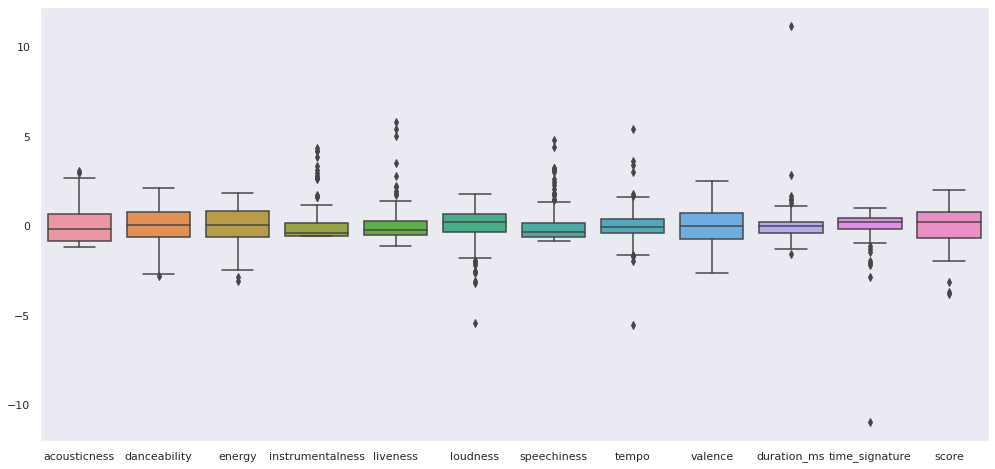

In [8]:
df_standard_charactheristics = stats.zscore(df.select_dtypes('float64')) # Normalize de values of only the columnn that have numeric values
fig, ax = plt.subplots(figsize=(17,8))
ax = sns.boxplot(data=df_standard_charactheristics)
plt.show()

According to the law of the interquartile range, we have some outliers in our data

In [9]:
pd.DataFrame(df['country'].value_counts()).head(10)

,country
EUA,90
Brasil,46
UK,20
Porto-Rico,2
França,2
Japão,2
Argentina,2
Colômbia,1
Itália,1
Canadá,1


The values of the 11 characteristics dont have the same range of values.

We decide to do an analysis per country because we have the data of albums of 22 different countries of which predominate EUA, Brasil and UK thus, we are going to do the following categories for country:

- USA
- Brazil
- UK
- Other

In [10]:
# Unique values per columns
df['country'] = df['country'].map({'Brasil':'Brazil', 'EUA':'USA', 'UK':'UK'}).fillna('Other')
df.head()

,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,score,release_date,country
0,The Black Parade,0.11,0.38,0.80,0.00,0.21,-4.23,0.08,138.34,0.36,"222,664.79",3.93,9.50,2006,USA
1,An Evening With Silk Sonic,0.05,0.66,0.61,0.00,0.24,-9.09,0.06,116.02,0.66,"218,689.50",4.00,9.50,2021,USA
2,A Tábua de Esmeralda,0.55,0.63,0.57,0.01,0.19,-13.69,0.04,123.82,0.91,"201,416.67",3.92,9.29,1974,Brazil
3,By The Way,0.05,0.52,0.83,0.00,0.19,-3.97,0.06,120.97,0.40,"255,129.61",4.00,9.20,2002,USA
4,Entren Los Que Quieran,0.33,0.61,0.72,0.03,0.22,-7.20,0.13,115.42,0.61,"225,124.71",3.86,9.17,2010,Other


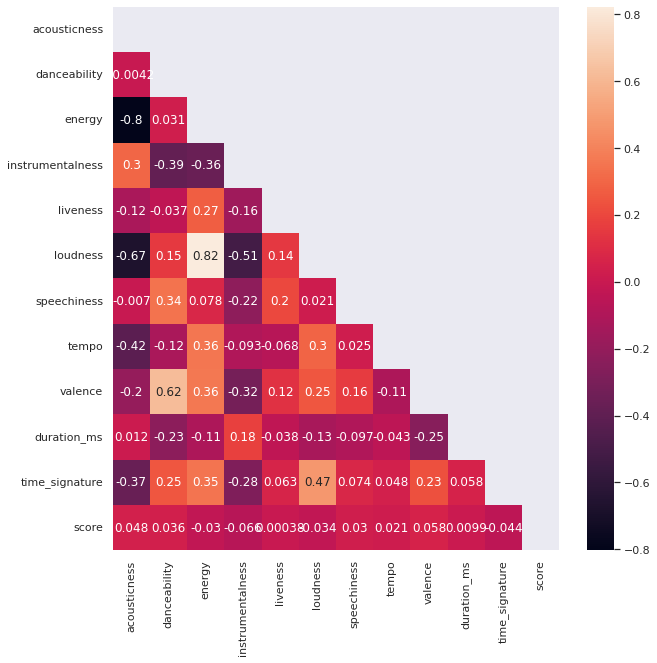

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

In the graph above, we notice that the values that have the most negative correlation are:
 1. Energy with acousticness 
 2. Loudness with acousticness

And with the most positive correlation:

 1. Loudness with instrumentalness
 2. Valence with danceability


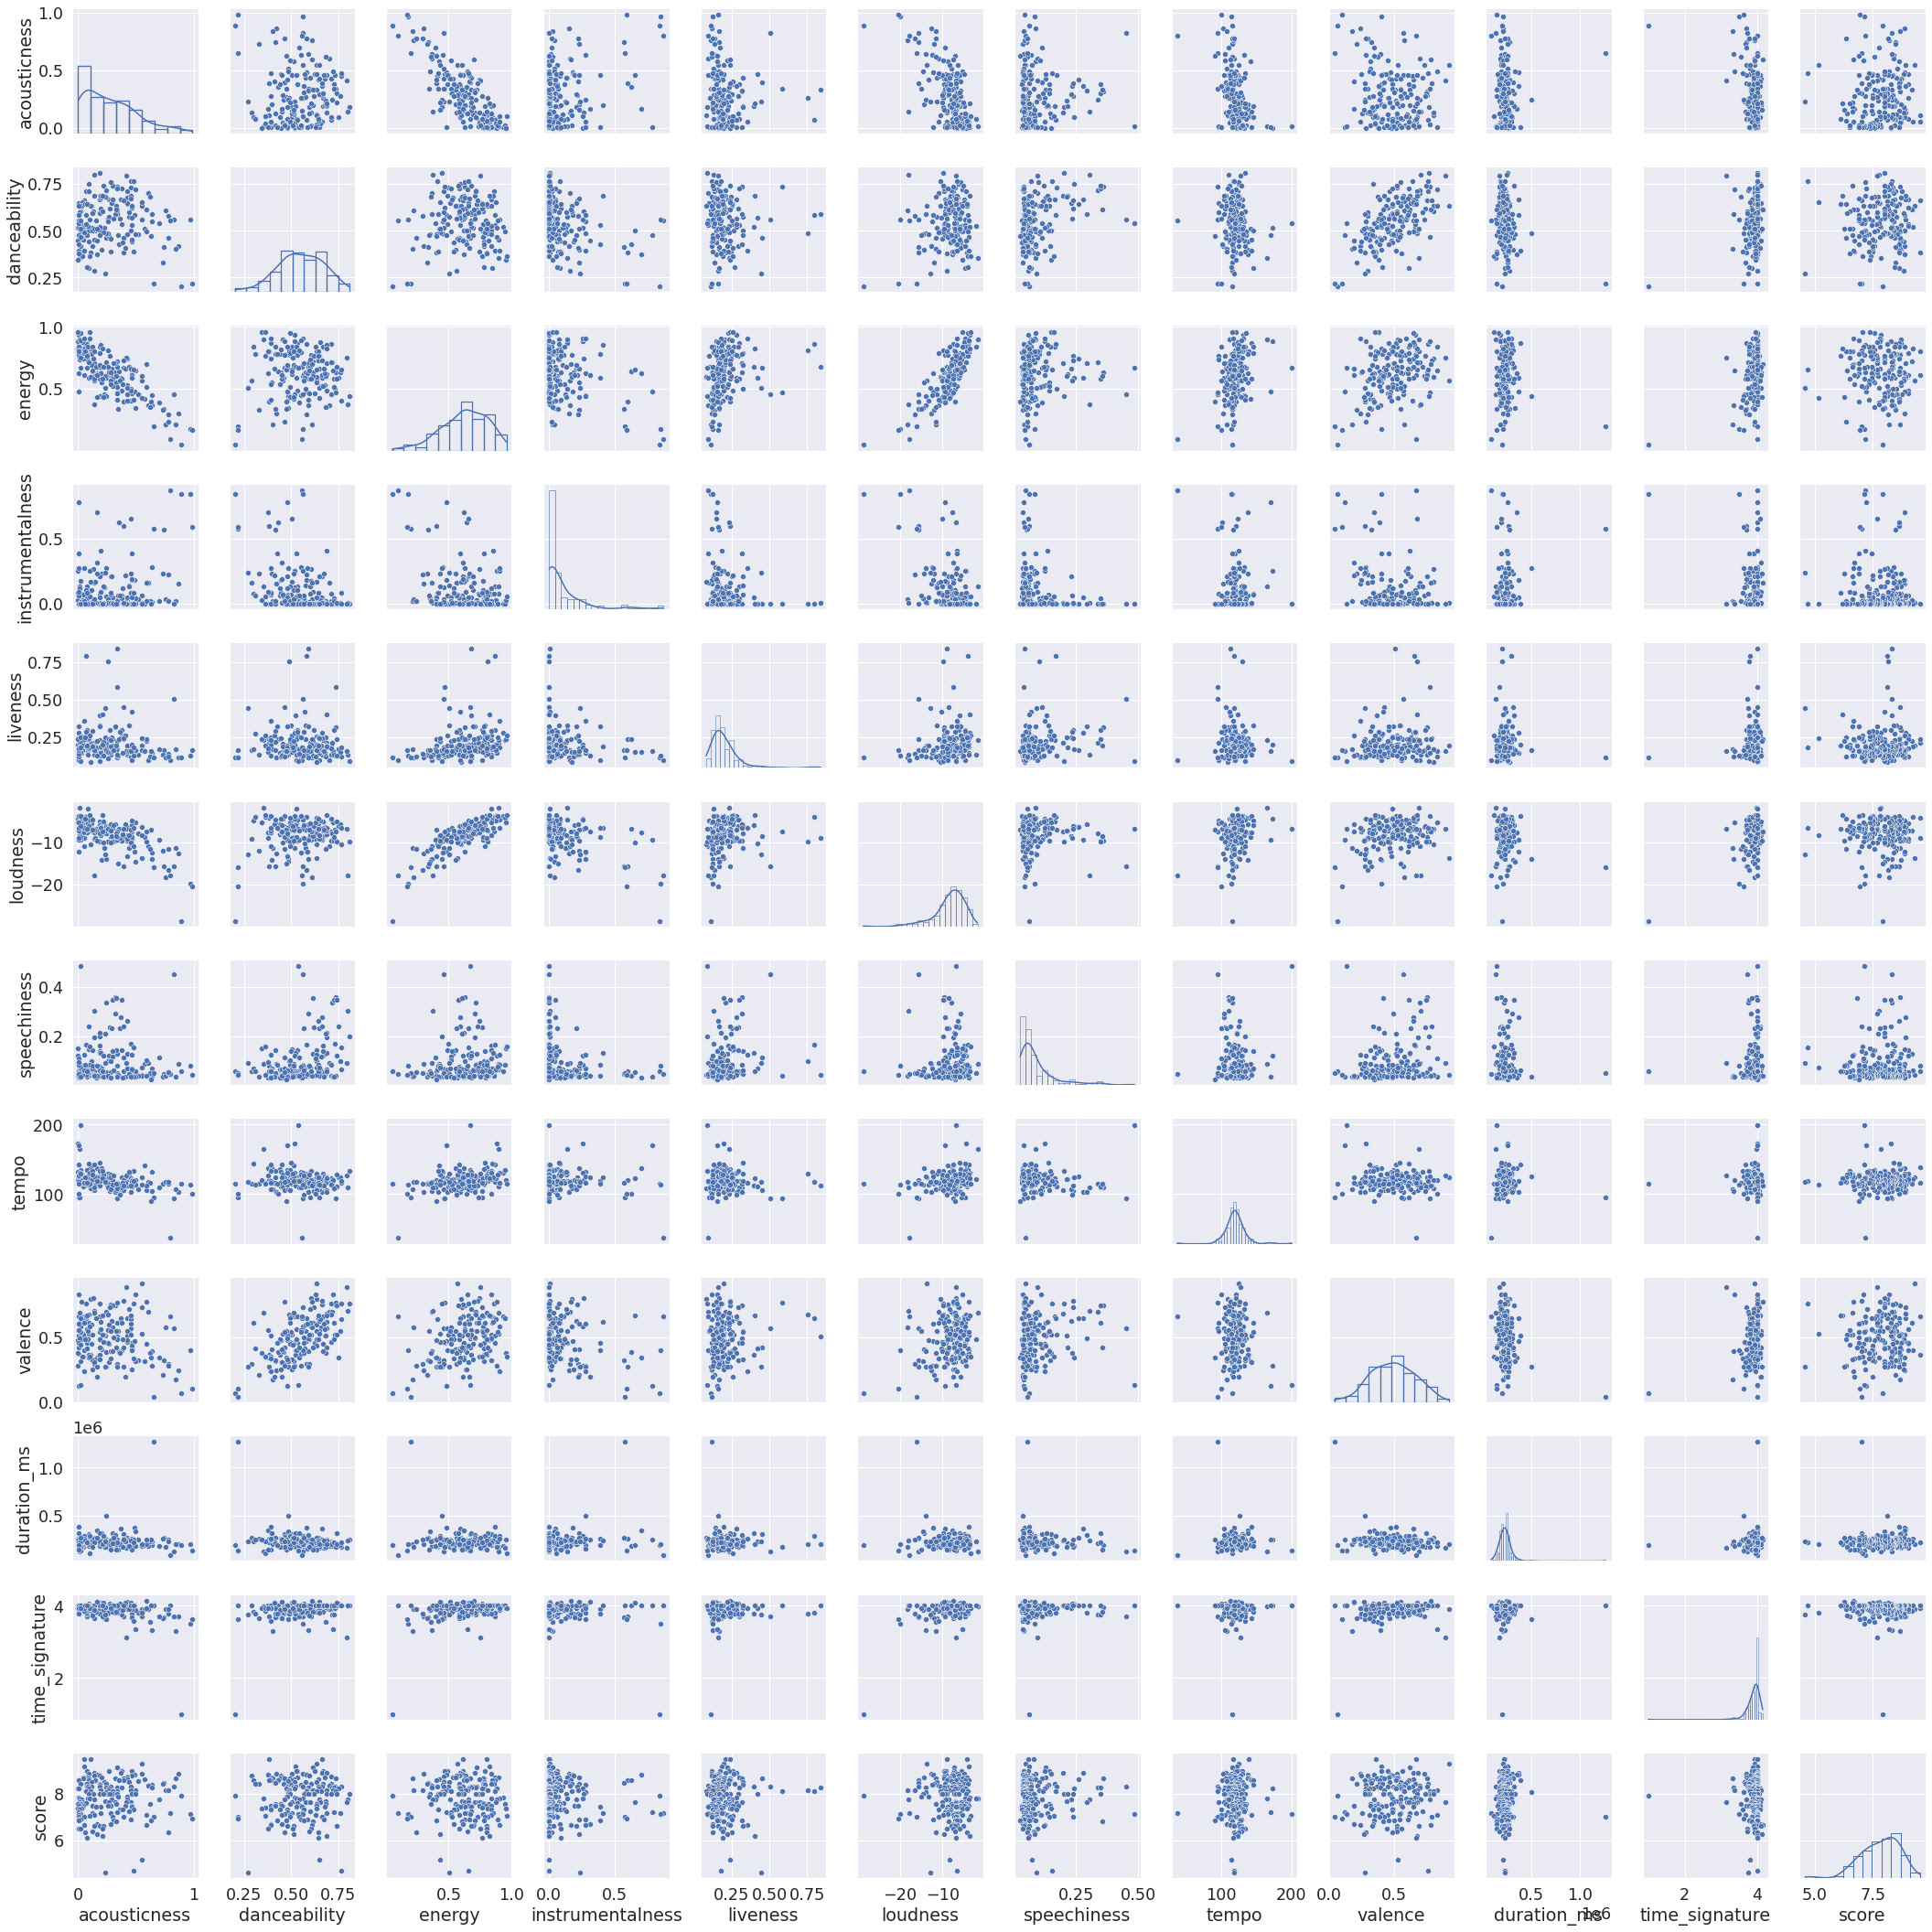

In [12]:
sns.set(font_scale=1.6)
sns.pairplot(df, diag_kws=dict(fill=False, kde=True))
plt.show()

In [13]:
charactheristics = ['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','time_signature', 'score']
results = []
alpha = 0.05
for charactheristic in charactheristics: 
    result = stats.normaltest(df[charactheristic])[1]

    if result < alpha:
        results.append('Yes')
    else:
        results.append('No')

pd.DataFrame({'charactheristic': charactheristics, 'The sample is statisticly different from a normal distribution': results})


,charactheristic,The sample is statisticly different from a normal distribution
0,acousticness,Yes
1,danceability,No
2,energy,Yes
3,instrumentalness,Yes
4,liveness,Yes
5,loudness,Yes
6,speechiness,Yes
7,tempo,Yes
8,valence,No
9,duration_ms,Yes


The charactheristics that came for the normal distribution are:
- Danceability
- Valence

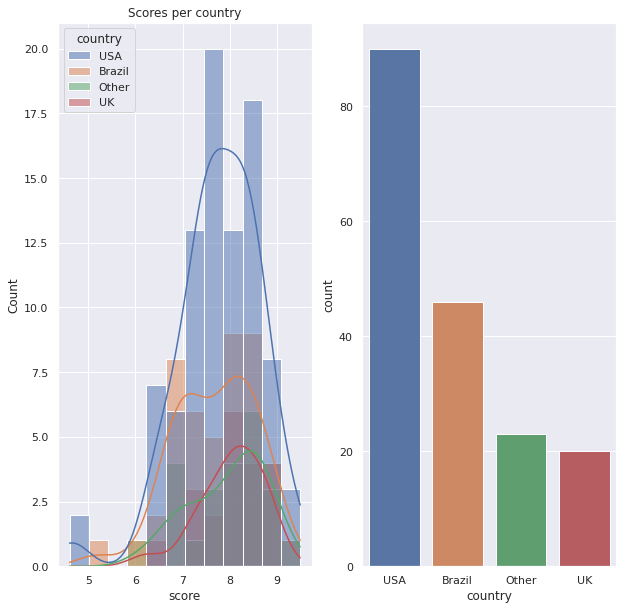

In [14]:
sns.set(context='notebook',font_scale=1, palette='deep')
fig, ax = plt.subplots(1,2,figsize=(10,10))

sns.histplot(ax=ax[0],data=df, x='score', kde=True, hue='country', stat='count').set(title='Scores per country')
sns.countplot(ax=ax[1], data=df, x='country')
plt.show()


Here we can see that the country that has the most positive ratings on their albums is the United States, followed by Brazil, and almost equally the other countries and the UK.

NOTE: This analysis can be affected for the quantity of data that each country has, for instance, in the case, USA USA appears more in the graphic above because it has more values ​​in the data.

In [15]:
df.groupby('country').median().sort_values('score', ascending=False)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,score
country,,,,,,,,,,,,
Other,0.25,0.56,0.71,0.03,0.16,-6.85,0.06,121.81,0.52,"223,867.45",3.93,8.25
UK,0.24,0.52,0.54,0.15,0.17,-9.16,0.06,119.73,0.40,"247,810.44",3.94,8.11
Brazil,0.33,0.61,0.63,0.02,0.17,-8.20,0.05,114.28,0.55,"208,907.39",3.95,7.83
USA,0.17,0.52,0.66,0.03,0.19,-7.11,0.07,121.32,0.48,"227,242.54",3.93,7.80
